In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("../data/ab-test.csv")

In [3]:
dataframe

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


In [4]:
dataframe_group = dataframe.groupby("group")

test = dataframe_group.get_group("test")

control = dataframe_group.get_group("control")

In [5]:
test

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


[Text(1, 0, 'Control'), Text(2, 0, 'Test')]

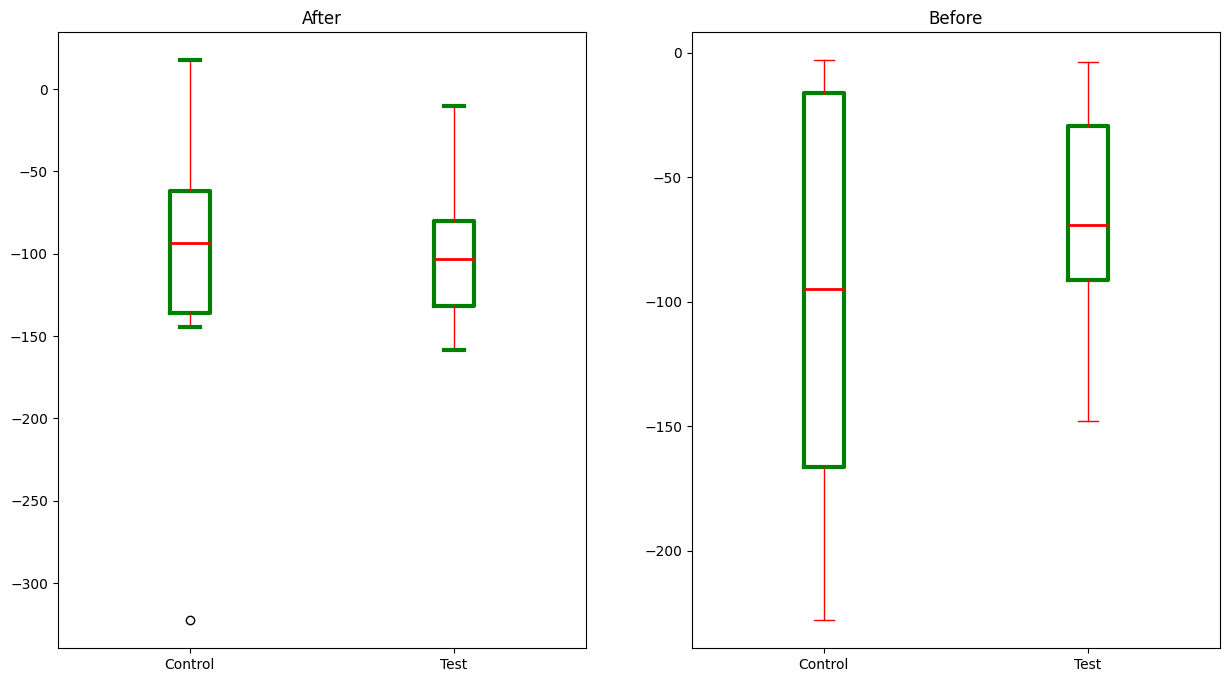

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Построение boxplot для "after" с настройками цветов
ax[0].boxplot([control[control["time"] == "after"]["diff"], test[test["time"] == "after"]["diff"]],
              whiskerprops=dict(color="red"),
              capprops=dict(color="green", linewidth = 3),
              boxprops=dict(color="green", linewidth=3),
              medianprops=dict(linewidth=2, color="red"))

ax[0].set_title("After")

ax[0].set_xticks([1, 2])

ax[0].set_xticklabels(["Control", "Test"])

# Построение boxplot для "before" с настройками цветов
ax[1].boxplot([control[control["time"] == "before"]["diff"], test[test["time"] == "before"]["diff"]],
              whiskerprops=dict(color="red"),
              capprops=dict(color="red"),
              boxprops=dict(color="green", linewidth=3),
              medianprops=dict(linewidth=2, color="red"))
ax[1].set_title("Before")
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(["Control", "Test"])

## Каков был IQR контрольной группы до новостной ленты?

- Before: 150
- After: 70